# **ESERCIZI LEZIONE 5**

### ***1. RISPONDERE ALLE DOMANDE***

In [2]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [4]:
sales[sales["sales"] > 10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [5]:
sales[sales["year"]==2018]

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [11]:
sales[(sales["year"]!=2018) & (sales["sales"] <= 13)]

,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [12]:
sales[(sales["sales"] / 3 ) > 3]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [15]:
sales[sales["employee"] > "J"]

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


### ***2. ANALISI DI UN DATASET DI VIDEOGIOCHI***

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
len(df)

16598

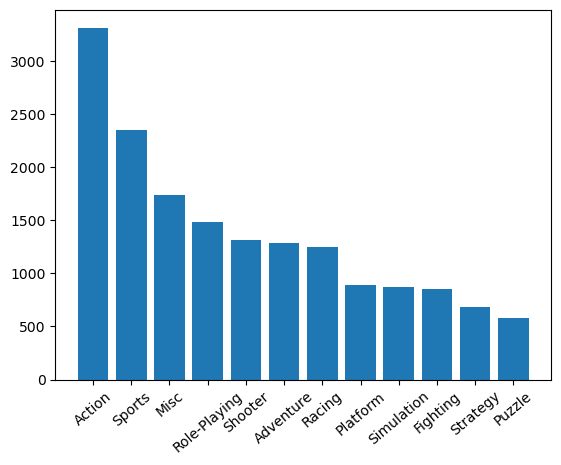

In [31]:
generi = df["Genre"].value_counts()

plt.bar(generi.index, generi.values)
plt.xticks(rotation=40)
plt.show()


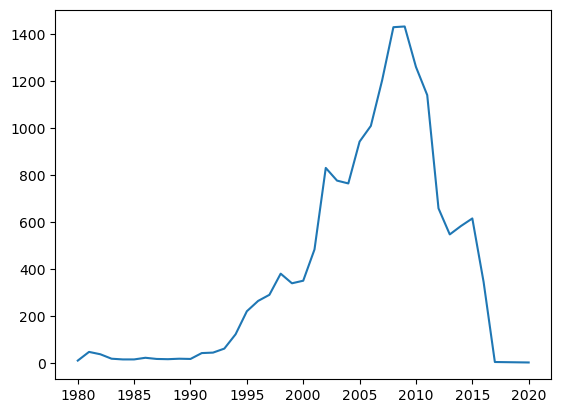

In [37]:
anni = df["Year"].value_counts().sort_index()

plt.plot(anni.index, anni.values)

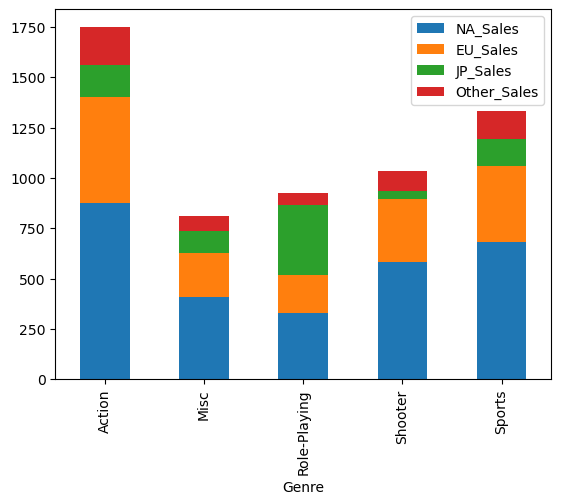

In [ ]:
top5_generi = generi.nlargest(5).index

df_filtrato = df[df['Genre'].isin(top5_generi)]

sales_by_genre = df_filtrato.groupby('Genre')[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

sales_by_genre['Total_Sales'] = sales_by_genre[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

sales_for_plot = sales_by_genre[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

sales_for_plot.plot(kind='bar', stacked=True)

plt.show()